In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 52.1 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

pos_df = pd.read_csv('/content/drive/MyDrive/item_data_postagging.csv')
pos_df.head()

,Unnamed: 0,Unnamed: 0.1,product_name,rates,review,label,pos
0,0,1,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n캄포어베니어 385...,4.3,배송은 빨랐고 조립하는 게 되게 체계적으로 돼있어서 놀랐어요 내부 공간은 넓은데 생...,1,배송 빨랐고 조립 하는 되게 체계 돼있어서 놀랐어요 내부 공간 넓은데 생각 사용 불...
1,1,2,[7%쿠폰]FIHA 서랍장 4.1단 6colors\n화이트 2981.3310,5.0,조립도 너무 쉽게 했고 가격 대비 괜찮은 것 같습니다,1,조립 너무 쉽게 했고 가격 대비 괜찮은 같습니다
2,2,3,[7%쿠폰]FIHA 서랍장 5단 6colors\n화이트 2269.3022,1.8,음 겉보기만 이쁩니다 오늘의 집에서 구입한 것 중 가장 후회해요 이유는 서랍이 잘 ...,0,겉보기 이쁩니다 오늘 구입 가장 후회 해요 이유 서랍 열립니다 닫힙니다 ㅜㅜ 열고 ...
3,3,4,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n캄포어베니어 385...,5.0,예뻐요 조립이 첨엔 어려울까 싶어서 걱정했는데 하다 보니 할만해요 크고 좋네요 잘...,1,예뻐요 조립 어려울까 싶어서 걱정 했는데 하다 보니 만해 크고 좋네요 쓸게요
4,4,5,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n미들브라운 6098...,4.8,설명서도 잘 되어있고 부속품들도 세심하게 알아보기 쉽게 너무 잘되어 있어서 조립하는...,1,설명 서도 되어있고 부속품 세심 하게 알아보기 쉽게 너무 되어 있어서 조립 하는 쉽...


In [11]:
pos_df.dropna(inplace = True)

In [12]:
pos_df

,Unnamed: 0,Unnamed: 0.1,product_name,rates,review,label,pos
0,0,1,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n캄포어베니어 385...,4.3,배송은 빨랐고 조립하는 게 되게 체계적으로 돼있어서 놀랐어요 내부 공간은 넓은데 생...,1,배송 빨랐고 조립 하는 되게 체계 돼있어서 놀랐어요 내부 공간 넓은데 생각 사용 불...
1,1,2,[7%쿠폰]FIHA 서랍장 4.1단 6colors\n화이트 2981.3310,5.0,조립도 너무 쉽게 했고 가격 대비 괜찮은 것 같습니다,1,조립 너무 쉽게 했고 가격 대비 괜찮은 같습니다
2,2,3,[7%쿠폰]FIHA 서랍장 5단 6colors\n화이트 2269.3022,1.8,음 겉보기만 이쁩니다 오늘의 집에서 구입한 것 중 가장 후회해요 이유는 서랍이 잘 ...,0,겉보기 이쁩니다 오늘 구입 가장 후회 해요 이유 서랍 열립니다 닫힙니다 ㅜㅜ 열고 ...
3,3,4,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n캄포어베니어 385...,5.0,예뻐요 조립이 첨엔 어려울까 싶어서 걱정했는데 하다 보니 할만해요 크고 좋네요 잘...,1,예뻐요 조립 어려울까 싶어서 걱정 했는데 하다 보니 만해 크고 좋네요 쓸게요
4,4,5,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n미들브라운 6098...,4.8,설명서도 잘 되어있고 부속품들도 세심하게 알아보기 쉽게 너무 잘되어 있어서 조립하는...,1,설명 서도 되어있고 부속품 세심 하게 알아보기 쉽게 너무 되어 있어서 조립 하는 쉽...
...,...,...,...,...,...,...,...
74433,74433,74527,[7%쿠폰]LEITER 선반 4단 2size\n그레이,4.8,한쪽 면이 찌그러져 왔지만 그래도 좋았습니다,1,한쪽 찌그러져 왔지만 그래도 좋았습니다
74434,74434,74528,[7%쿠폰]LEITER 선반 4단 2size\n그레이,4.8,그레이랑 화이트 컬러 샀는데 그레이가 생각보다 톤 다운된 그레이라 너무 이뻐요 화이...,1,그레이 화이트 컬러 샀는데 그레이 생각 다운 그레이 너무 이뻐요 화이트 밝은 벽지 ...
74435,74435,74529,[7%쿠폰]LEITER 선반 4단 2size\n매트실버,4.0,잘 쓰고 있어요 오램만에 어플 키니 리부 남겨라 하네요 ㅋㅋㅋ 좋아요,1,쓰고 있어요 어플 리부 남겨라 하네요 ㅋㅋㅋ 좋아요
74436,74436,74530,[7%쿠폰]LEITER 선반 4단 2size\n화이트,4.8,올려놓는 선반 부분이 힘이 없다 보니까 가벼운 물건 올려놓으면 지탱하는 게 위태위태...,1,올려놓는 선반 부분 없다 가벼운 물건 올려놓으면 지탱 하는 태위 태해 보이 이쁨


In [13]:
def get_nouns(tokenizer, sentence):
    tagged = tokenizer.pos(sentence)
    words = [s for s, t in tagged if t in ['Adjective', 'KoreanParticle', 'Noun',
                                           'Verb', 'Adverb'] and len(s) > 1]
    return words

In [14]:
def tokenize(text):
    tokenizer = Okt()
    processed_data = []
    for sent in tqdm(text):
        tokenized_sentence = tokenizer.morphs(text, stem = True)
        stopwords_removed_sentence = [word for word in sent if not word in stopwords_list]
        processed_data.append(stopwords_removed_sentence)

    return processed_data

In [8]:
#okt -> han-spell로 띄어쓰기 교정을 어느 정도 완료를 했기 때문에 
from konlpy.tag import Okt
pos_df['review'] = pos_df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pos_df['pos'])
print(len(tokenizer.word_index))

35010


In [29]:
threshold = 5
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 35010
등장 빈도가 4번 이하인 희귀 단어의 수: 26058
단어 집합에서 희귀 단어의 비율: 74.43016281062553
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.10528758576642


In [30]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 8953


In [31]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(pos_df['pos'])
pos_to_sequences = tokenizer.texts_to_sequences(pos_df['pos'])

In [33]:
drop_train = [index for index, sentence in enumerate(pos_to_sequences) if len(sentence) < 1]

pos_to_sequences = np.delete(pos_to_sequences, drop_train, axis=0)
print(len(pos_to_sequences))


74355


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


리뷰의 최대 길이 : 109
리뷰의 평균 길이 : 12.559827852867999


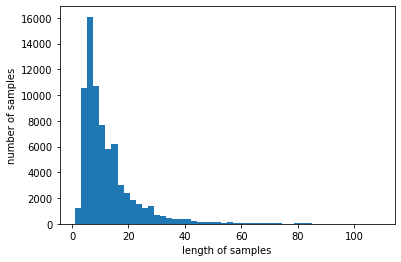

In [35]:
print('리뷰의 최대 길이 :',max(len(review) for review in pos_to_sequences))
print('리뷰의 평균 길이 :',sum(map(len, pos_to_sequences))/len(pos_to_sequences))
plt.hist([len(review) for review in pos_to_sequences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [36]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [38]:
max_len = 30
below_threshold_len(max_len, pos_to_sequences)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.34604263331316


In [39]:
pos_to_padding_sequences = pad_sequences(pos_to_sequences, maxlen=max_len)

In [42]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/text_mining_LSTM.h5')

In [43]:
output = model.predict(pos_to_padding_sequences)
output

array([[0.33579326],
       [0.9712018 ],
       [0.22644147],
       ...,
       [0.8789186 ],
       [0.05211157],
       [0.9688559 ]], dtype=float32)

In [56]:
len(output), len(pos_df), drop_train
pos_df = pos_df.drop(drop_train, axis = 0)


In [58]:
pos_df = pos_df.reset_index().drop(['index'], axis = 1)

In [65]:
output = output * 5

In [68]:
pos_df['sentiment_score'] = output
pos_df['correction_score'] = (pos_df['rates'] + pos_df['sentiment_score']) / 2

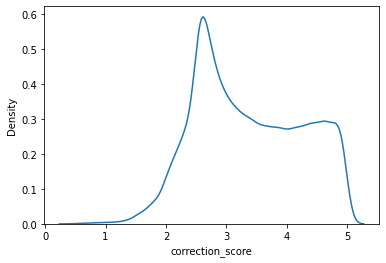

In [72]:
import seaborn as sns
sns.kdeplot(x = pos_df['correction_score'])

In [87]:
index = 21232
pos_df['pos'][index], pos_df['review'][index], output[index]

('저렴하게 구입 해서 쓰고 있어요 조립 쉬웠고 만족합니다',
 '저렴하게 구입해서 잘 쓰고 있어요 조립도 쉬웠고 만족합니다',
 array([4.187708], dtype=float32))

In [88]:
pos_df.to_csv('/content/drive/MyDrive/final_data.csv')